#  Applied Machine Learning - Putting it all together

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [31]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

<br><br>

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this i will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where i'll have to use my own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure i have to explain my decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have my final code. That said, my code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, i should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in my code. 
3. If i realize that i am repeating a lot of code try to organize it in functions. Clear presentation of my code, experiments, and results is the key to be successful in this lab. I may use code from previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If i end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

I am plan to grade fairly and leniently. i don't have some secret target score that i need to achieve to get a good grade. **I'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if i just have a bunch of code and no text or figures, that's not good. If i do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to me to decide when i am "done" -- in fact, this is one of the hardest parts of real projects. 

<br><br>

## Understanding the problem <a name="1"></a>
<hr>

In this mini project, i will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, i will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. I may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**tasks:**

1. Spend some time understanding the problem and what each feature means.I can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Writing a few sentences on my initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<br><br>

In [32]:
data =  pd.read_csv("Credit_Card.csv", sep=",")
data.T

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,29991.0,29992.0,29993.0,29994.0,29995.0,29996.0,29997.0,29998.0,29999.0,30000.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0,...,140000.0,210000.0,10000.0,100000.0,80000.0,220000.0,150000.0,30000.0,80000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,...,2.0,2.0,3.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0,37.0,29.0,23.0,28.0,35.0,...,41.0,34.0,43.0,38.0,34.0,39.0,43.0,37.0,41.0,46.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,3.0,0.0,0.0,2.0,0.0,-1.0,4.0,1.0,0.0
PAY_2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0,...,0.0,2.0,0.0,-1.0,2.0,0.0,-1.0,3.0,-1.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,2.0,-2.0,...,0.0,2.0,0.0,-1.0,2.0,0.0,-1.0,2.0,0.0,0.0
PAY_4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,2.0,-2.0,0.0,2.0,0.0,-1.0,-1.0,0.0,0.0


## Data splitting <a name="2"></a>
<hr>

**tasks:**

1. Split the data into train and test portions. 

In [33]:
train_df, test_df = train_test_split(data, test_size=0.20, random_state=123)

In [34]:
train_df.T

,19682,11062,197,23620,26031,15116,20908,11504,17359,29078,...,26169,13435,7763,15377,21602,28636,17730,28030,15725,19966
ID,19683.0,11063.0,198.0,23621.0,26032.0,15117.0,20909.0,11505.0,17360.0,29079.0,...,26170.0,13436.0,7764.0,15378.0,21603.0,28637.0,17731.0,28031.0,15726.0,19967.0
LIMIT_BAL,200000.0,120000.0,20000.0,100000.0,290000.0,50000.0,150000.0,50000.0,200000.0,100000.0,...,50000.0,160000.0,100000.0,30000.0,90000.0,380000.0,360000.0,50000.0,30000.0,370000.0
SEX,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
EDUCATION,2.0,1.0,1.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,...,1.0,2.0,2.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0
MARRIAGE,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
AGE,46.0,32.0,22.0,34.0,29.0,51.0,49.0,45.0,49.0,56.0,...,39.0,32.0,26.0,41.0,23.0,37.0,54.0,29.0,21.0,36.0
PAY_0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,...,1.0,0.0,0.0,-2.0,0.0,0.0,1.0,0.0,0.0,-2.0
PAY_2,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0
PAY_3,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0
PAY_4,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,-1.0,0.0,0.0,-2.0,0.0,0.0,-1.0,0.0,0.0,-2.0


<br><br>

## EDA <a name="3"></a>
<hr>


**tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [35]:
# Lets see all columns into the train_df DataFrame

train_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

>Lets grab information through our data  

In [36]:
data.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [38]:
# Getting all numeric columns from the train_df 

numeric_columns = list(train_df.select_dtypes([np.number]).columns.values)
numeric_columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

>By reviweing this data we can see that there is no Null data into the data set but i suspect that there must be NaN value.

In [39]:
data.isna().sum() # clearing dought is an good option. Hence, we can see that ther is no NaN values the the dataset

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

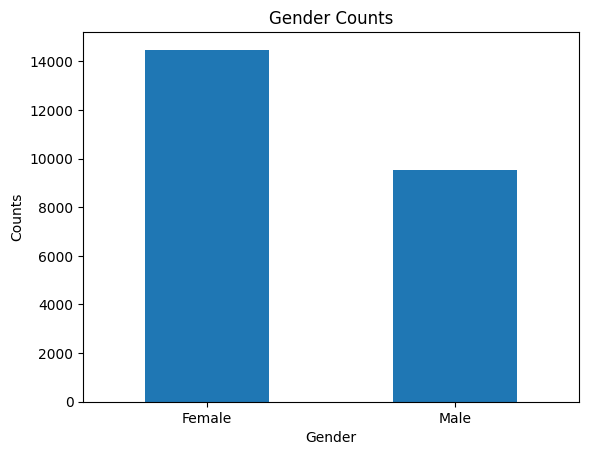

In [40]:
# Gender Bifurcation
Gender = train_df["SEX"].map({1:"Male", 2:"Female"})
Gender.value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Gender Counts")
plt.xticks(rotation=0)

# As we see that the data has more number of female customers 

>Seperating data into 3 parts [Married, Single & Others] to check which group have more number of bill ammount 

In [41]:
sum_bill_married = []
sum_bill_single = []
sum_bill_others = []
val=0

for loop in train_df.MARRIAGE:
    if  loop == 1 :
        bill = train_df.iloc[val, 12:18].sum()
        sum_bill_married.append(bill)
        val+=1
    elif loop == 2 :
        bill = train_df.iloc[val, 12:18].sum()
        sum_bill_single.append(bill)
        val+=1
    else :
        bill = train_df.iloc[val, 12:18].sum()
        sum_bill_others.append(bill)
        val+=1

In [42]:
sum_bill_married

[577697.0,
 5812.0,
 30454.0,
 296944.0,
 0.0,
 711015.0,
 33785.0,
 37032.0,
 45634.0,
 305968.0,
 1580.0,
 247843.0,
 690295.0,
 10034.0,
 551765.0,
 18762.0,
 78944.0,
 589136.0,
 2388.0,
 1501979.0,
 202469.0,
 1092139.0,
 112884.0,
 178379.0,
 197601.0,
 85940.0,
 3375.0,
 19803.0,
 776364.0,
 12653.0,
 5988.0,
 624648.0,
 63695.0,
 8596.0,
 8139.0,
 42119.0,
 427012.0,
 197038.0,
 904048.0,
 7645.0,
 212220.0,
 152053.0,
 595.0,
 135504.0,
 90324.0,
 55183.0,
 361615.0,
 17140.0,
 1413611.0,
 3043.0,
 538121.0,
 3778.0,
 722282.0,
 40868.0,
 234879.0,
 4024.0,
 62923.0,
 1627.0,
 41956.0,
 5654.0,
 45663.0,
 810292.0,
 22950.0,
 52443.0,
 11536.0,
 250907.0,
 858328.0,
 680803.0,
 855387.0,
 795206.0,
 16263.0,
 648162.0,
 206887.0,
 141037.0,
 807590.0,
 111962.0,
 14686.0,
 224492.0,
 466286.0,
 632035.0,
 608164.0,
 188078.0,
 247134.0,
 94223.0,
 680782.0,
 408672.0,
 240274.0,
 217096.0,
 2914476.0,
 0.0,
 557042.0,
 604435.0,
 609546.0,
 80532.0,
 1989.0,
 221890.0,
 191073

In [43]:
sum_bill_single

[103511.0,
 304387.0,
 51818.0,
 530747.0,
 136210.0,
 85908.0,
 83311.0,
 41017.0,
 134074.0,
 220414.0,
 367482.0,
 33900.0,
 118753.0,
 38925.0,
 547819.0,
 79000.0,
 1540629.0,
 41544.0,
 222816.0,
 63613.0,
 42723.0,
 0.0,
 248503.0,
 1956.0,
 508111.0,
 10713.0,
 1281497.0,
 38090.0,
 181258.0,
 3700.0,
 278348.0,
 3996.0,
 68980.0,
 74252.0,
 -654.0,
 208034.0,
 5011.0,
 467762.0,
 96597.0,
 61650.0,
 41218.0,
 406603.0,
 120909.0,
 0.0,
 114872.0,
 179418.0,
 46983.0,
 382179.0,
 74617.0,
 34633.0,
 207889.0,
 185551.0,
 696608.0,
 452861.0,
 288372.0,
 668063.0,
 585393.0,
 122590.0,
 83802.0,
 638465.0,
 216955.0,
 341499.0,
 40886.0,
 441616.0,
 587035.0,
 117955.0,
 4096.0,
 116907.0,
 78014.0,
 66921.0,
 129200.0,
 37974.0,
 0.0,
 803937.0,
 235768.0,
 197420.0,
 149291.0,
 126173.0,
 118397.0,
 1776.0,
 473098.0,
 403498.0,
 7602.0,
 887.0,
 3474.0,
 700.0,
 608623.0,
 86732.0,
 974518.0,
 114703.0,
 5000.0,
 211087.0,
 55712.0,
 68876.0,
 178974.0,
 54900.0,
 60506.0,
 6

In [44]:
sum_bill_others

[208039.0,
 179444.0,
 3424.0,
 244180.0,
 166411.0,
 56290.0,
 62135.0,
 32253.0,
 123027.0,
 368677.0,
 206567.0,
 413797.0,
 34216.0,
 468885.0,
 202576.0,
 74449.0,
 231633.0,
 0.0,
 51564.0,
 1319236.0,
 173541.0,
 104742.0,
 263606.0,
 757038.0,
 107974.0,
 100228.0,
 17730.0,
 30355.0,
 614823.0,
 411638.0,
 192949.0,
 110059.0,
 1751825.0,
 3378.0,
 15793.0,
 98883.0,
 113540.0,
 374545.0,
 131509.0,
 1084469.0,
 8163.0,
 113370.0,
 112566.0,
 170727.0,
 599341.0,
 14400.0,
 11720.0,
 100376.0,
 333369.0,
 19186.0,
 269237.0,
 -7010.0,
 622625.0,
 851933.0,
 52864.0,
 1069671.0,
 284960.0,
 168031.0,
 323113.0,
 195490.0,
 247844.0,
 181416.0,
 177857.0,
 116299.0,
 134162.0,
 4148.0,
 0.0,
 37681.0,
 408757.0,
 262412.0,
 54202.0,
 8474.0,
 86517.0,
 111327.0,
 3751.0,
 10110.0,
 287973.0,
 509530.0,
 521522.0,
 5340.0,
 1020603.0,
 608681.0,
 236473.0,
 77306.0,
 29960.0,
 19874.0,
 99134.0,
 600.0,
 49803.0,
 33051.0,
 255699.0,
 84617.0,
 12590.0,
 16154.0,
 18438.0,
 76268

In [45]:
print("TOTAL BILL OF CUSTOMERS WHO IS MARRIED :",sum(sum_bill_married))
print("TOTAL BILL OF CUSTOMERS WHO IS SINGLE :", sum(sum_bill_single))
print( "TOTAL BILL OF CUSTOMERS IDENTIFIED AS OTHERS :", sum(sum_bill_others))

TOTAL BILL OF CUSTOMERS WHO IS MARRIED : 3075450507.0
TOTAL BILL OF CUSTOMERS WHO IS SINGLE : 3333803367.0
TOTAL BILL OF CUSTOMERS IDENTIFIED AS OTHERS : 56986358.0


([<matplotlib.patches.Wedge at 0x23079b67b50>,
 [Text(0.0841808906384908, 1.0967741689387613, 'Married'),
  Text(-0.12492070705609684, -1.1934801284263619, 'Single'),
  Text(1.0995784270715299, -0.030451317194830966, 'Others')],
 [Text(0.045916849439176795, 0.5982404557847788, '48%'),
  Text(-0.07287041244938981, -0.6961967415820443, '52%'),
  Text(0.5997700511299253, -0.016609809378998707, '1%')])

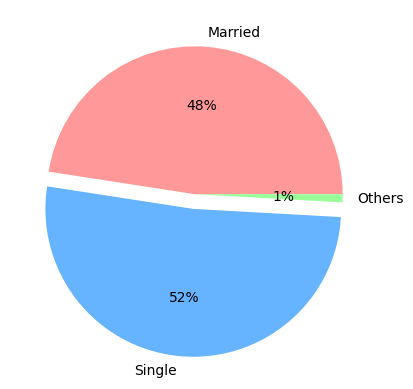

In [46]:
pie_data = [3075450507.0, 3333803367.0, 56986358.0]
pie_keys = ['Married', 'Single', 'Others']
  
# declaring exploding pie
explode = [0, 0.1, 0]
# define Seaborn color palette to use
palette_color = ['#ff9999','#66b3ff','#99ff99']
  
# plotting data on chart
plt.pie(pie_data, labels=pie_keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

>Here we can see that the marital sataus : single, have more ammount of bill ammount. 
Which represents that most individual who are single tend to spend a lot.
Let's dig more into this data and see which gender has high bill ammount who are single, it is obvious that the data. Which we have has more data about female but just to be sure that spending of an individal matters and which might show that single male tend to spend a lot more than female, who knows? Let's check

In [47]:
# Creating Data Frame for single male
single_male = train_df[(train_df["SEX"]==1) & (train_df["MARRIAGE"]==2)]    
single_male

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
20908,20909,150000.0,1,2,2,49,0,0,0,0,...,88692.0,90211.0,91543.0,3090.0,3218.0,3196.0,3360.0,3310.0,3573.0,0
5878,5879,710000.0,1,2,2,33,-1,-1,-1,-1,...,6299.0,4720.0,3738.0,17330.0,944.0,7586.0,4739.0,3754.0,25259.0,0
11011,11012,220000.0,1,2,2,35,1,-2,-1,0,...,46177.0,3308.0,2912.0,0.0,220230.0,7308.0,0.0,2912.0,0.0,0
4160,4161,50000.0,1,1,2,25,4,4,4,4,...,37264.0,36396.0,35659.0,2000.0,2000.0,0.0,0.0,0.0,3001.0,0
2943,2944,20000.0,1,2,2,24,0,0,2,0,...,19593.0,20001.0,19466.0,3232.0,0.0,815.0,858.0,832.0,560.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26626,26627,50000.0,1,2,2,23,0,0,-2,-2,...,0.0,15239.0,14853.0,0.0,0.0,0.0,15239.0,0.0,540.0,1
12739,12740,20000.0,1,2,2,30,0,0,0,0,...,16428.0,0.0,0.0,1392.0,1200.0,329.0,0.0,0.0,8644.0,0
20553,20554,80000.0,1,1,2,28,0,0,0,0,...,36207.0,32515.0,15128.0,2500.0,2548.0,2500.0,1100.0,1000.0,1000.0,0
20527,20528,30000.0,1,2,2,25,1,2,-1,0,...,1261.0,772.0,390.0,0.0,261.0,1000.0,772.0,8.0,390.0,1


In [48]:
# Adding all bill amount of single male
single_male_sum_bill = single_male.BILL_AMT1.sum() + single_male.BILL_AMT2.sum() + single_male.BILL_AMT3.sum() + single_male.BILL_AMT4.sum() +single_male.BILL_AMT5.sum() + single_male.BILL_AMT6.sum()
print("TOTAL BILL AMOUNT OF ALL MALE CUSTOMERS WHO IS SINGLE :", single_male_sum_bill)

TOTAL BILL AMOUNT OF ALL MALE CUSTOMERS WHO IS SINGLE : 1394991882.0


In [49]:
# Creating Data Frame for single Female
single_female = train_df[(train_df["SEX"]==2) & (train_df["MARRIAGE"]==2)]    
single_female

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
197,198,20000.0,2,1,2,22,0,0,0,0,...,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0,0
23620,23621,100000.0,2,5,2,34,0,0,0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
26031,26032,290000.0,2,2,2,29,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0
22940,22941,100000.0,2,1,2,28,0,0,0,0,...,23596.0,24068.0,24679.0,1800.0,2000.0,1400.0,863.0,1000.0,2000.0,0
9849,9850,100000.0,2,1,2,25,0,0,0,0,...,14838.0,15447.0,16539.0,1600.0,2000.0,1000.0,1000.0,1500.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,5665,50000.0,2,1,2,26,1,-2,-2,-2,...,-1.0,349.0,350.0,0.0,0.0,0.0,350.0,351.0,4076.0,0
22241,22242,150000.0,2,2,2,30,-1,-1,-2,-2,...,-208.0,993.0,0.0,0.0,239.0,0.0,1201.0,0.0,2184.0,0
7763,7764,100000.0,2,2,2,26,0,0,0,0,...,50508.0,51543.0,52685.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0
21602,21603,90000.0,2,2,2,23,0,0,0,0,...,71668.0,49358.0,50296.0,3432.0,3615.0,3511.0,2500.0,2000.0,1850.0,1


In [50]:
# Adding all bill amount of single female
single_female_sum_bill = single_female.BILL_AMT1.sum() + single_female.BILL_AMT2.sum() + single_female.BILL_AMT3.sum() + single_female.BILL_AMT4.sum() +single_female.BILL_AMT5.sum() + single_female.BILL_AMT6.sum()
print("TOTAL BILL AMOUNT OF ALL FEMALE CUSTOMERS WHO IS SINGLE : ", single_female_sum_bill)

TOTAL BILL AMOUNT OF ALL FEMALE CUSTOMERS WHO IS SINGLE :  1938811485.0


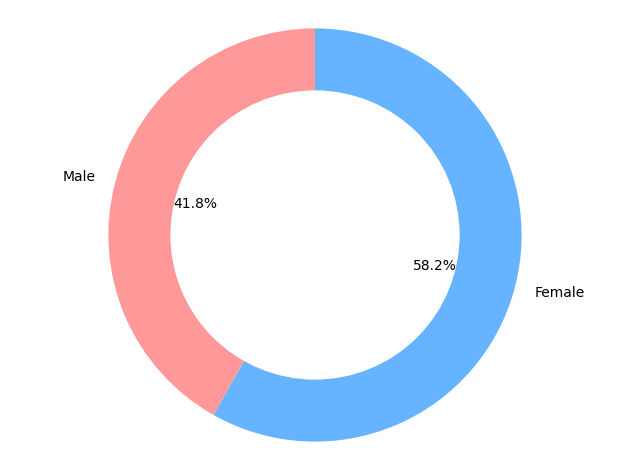

In [51]:
# Lets plot donut chart from pie chat to understand the resut more efficiently 

pie_data = [single_male_sum_bill, single_female_sum_bill]
pie_keys = ['Male', 'Female']
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = ['#ff9999','#66b3ff','#99ff99']
  
# plotting data on chart
fig1, ax1 = plt.subplots()
ax1.pie(pie_data, colors = palette_color, labels=pie_keys, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

>As we predicted that the data must be in the favour for females simultaneously we prove that the bill amount of the female are more than male. There are more question related to our analysis. Question like, do education matters in the exprendure of female

In [52]:
single_female

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
197,198,20000.0,2,1,2,22,0,0,0,0,...,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0,0
23620,23621,100000.0,2,5,2,34,0,0,0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
26031,26032,290000.0,2,2,2,29,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0
22940,22941,100000.0,2,1,2,28,0,0,0,0,...,23596.0,24068.0,24679.0,1800.0,2000.0,1400.0,863.0,1000.0,2000.0,0
9849,9850,100000.0,2,1,2,25,0,0,0,0,...,14838.0,15447.0,16539.0,1600.0,2000.0,1000.0,1000.0,1500.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,5665,50000.0,2,1,2,26,1,-2,-2,-2,...,-1.0,349.0,350.0,0.0,0.0,0.0,350.0,351.0,4076.0,0
22241,22242,150000.0,2,2,2,30,-1,-1,-2,-2,...,-208.0,993.0,0.0,0.0,239.0,0.0,1201.0,0.0,2184.0,0
7763,7764,100000.0,2,2,2,26,0,0,0,0,...,50508.0,51543.0,52685.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0
21602,21603,90000.0,2,2,2,23,0,0,0,0,...,71668.0,49358.0,50296.0,3432.0,3615.0,3511.0,2500.0,2000.0,1850.0,1


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'university'),
  Text(1, 0, 'graduate school'),
  Text(2, 0, 'high school'),
  Text(3, 0, 'unknown'),
  Text(4, 0, 'others')])

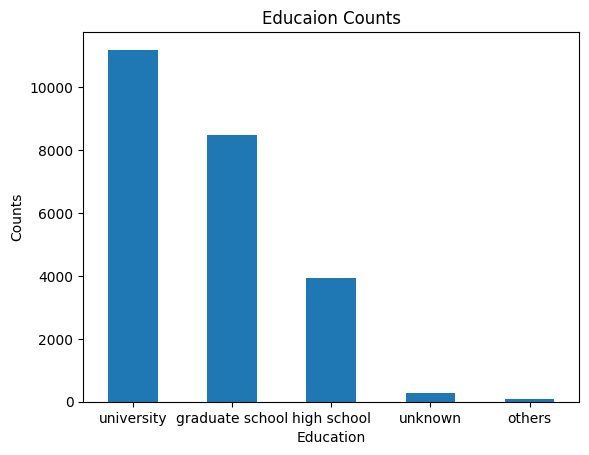

In [53]:
# simplyfying the data for better understand

education = train_df["EDUCATION"].map({1 : "graduate school", 2 : "university", 3 : "high school", 4 : "others", 5 : "unknown", 6 : "unknown"})
education.value_counts().plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Counts")
plt.title("Educaion Counts")
plt.xticks(rotation=0)


>Well, the data shows that female who are single and persuading eduction at university have more expenditure 
According to the google data of Taiwan(based on our dataset "bill statements of credit card clients in Taiwan") 2005, the average age of single female is between 17-19. The age group between 17-19 have a huge expenditure(bill_amount)

#### : Let's check the amount paid back to the credit card company from single females who are studying in university

In [54]:
single_university_female=single_female[(single_female["EDUCATION"]==2)]
single_university_female

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26031,26032,290000.0,2,2,2,29,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0
5131,5132,210000.0,2,2,2,34,-1,-1,-1,-1,...,3265.0,8623.0,5907.0,2996.0,4584.0,3274.0,8648.0,5924.0,15748.0,0
5239,5240,330000.0,2,2,2,28,0,0,0,0,...,258220.0,256058.0,256840.0,9425.0,9000.0,9174.0,9590.0,9500.0,9400.0,0
25267,25268,30000.0,2,2,2,25,0,0,0,0,...,30619.0,29146.0,29823.0,2000.0,2000.0,1700.0,1200.0,1300.0,1300.0,0
3296,3297,20000.0,2,2,2,26,0,0,0,0,...,8007.0,4890.0,0.0,1456.0,1005.0,160.0,98.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22752,22753,200000.0,2,2,2,34,0,0,0,-1,...,1078.0,1598.0,171700.0,5504.0,1526.0,1078.0,1598.0,173026.0,6000.0,0
22241,22242,150000.0,2,2,2,30,-1,-1,-2,-2,...,-208.0,993.0,0.0,0.0,239.0,0.0,1201.0,0.0,2184.0,0
7763,7764,100000.0,2,2,2,26,0,0,0,0,...,50508.0,51543.0,52685.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0
21602,21603,90000.0,2,2,2,23,0,0,0,0,...,71668.0,49358.0,50296.0,3432.0,3615.0,3511.0,2500.0,2000.0,1850.0,1


In [55]:
# Adding all bill amount of single university female
single_university_female_sum_bill = single_university_female.BILL_AMT1.sum() + single_university_female.BILL_AMT2.sum() + single_university_female.BILL_AMT3.sum() + single_university_female.BILL_AMT4.sum() +single_university_female.BILL_AMT5.sum() + single_university_female.BILL_AMT6.sum()
print("TOTAL BILL AMOUNT OF ALL FEMALE CUSTOMERS WHO IS SINGLE AND STUDY AT UNIVERSITY : ",single_university_female_sum_bill)

TOTAL BILL AMOUNT OF ALL FEMALE CUSTOMERS WHO IS SINGLE AND STUDY AT UNIVERSITY :  932179190.0


In [56]:
# Adding all pay amount of single university female
single_university_female_sum_pay = single_university_female.PAY_AMT1.sum() + single_university_female.PAY_AMT2.sum() + single_university_female.PAY_AMT3.sum() + single_university_female.PAY_AMT4.sum() +single_university_female.PAY_AMT5.sum() + single_university_female.PAY_AMT6.sum()
print("TOTAL AMOUNT PAID BY ALL FEMALE CUSTOMERS WHO IS SINGLE AND STUDY AT UNIVERSITY : ", single_university_female_sum_pay)

TOTAL AMOUNT PAID BY ALL FEMALE CUSTOMERS WHO IS SINGLE AND STUDY AT UNIVERSITY :  92581652.0


In [57]:
# Checking the difference amount

difference_amount = single_university_female_sum_pay - single_university_female_sum_bill
print("THE DIFFERENCE AMOUNT IS : ",difference_amount, "NT$")

THE DIFFERENCE AMOUNT IS :  -839597538.0 NT$


>Difference amount - 839 Million NT Dollar which is equivalent to - 273 million US Dollar 
which is huge amount payable, single university female to credit card compay

## Preprocessing and transformations <a name="5"></a>
<hr>

**tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [58]:
# Checking all datatypes of every colomns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 19682 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          24000 non-null  int64  
 1   LIMIT_BAL                   24000 non-null  float64
 2   SEX                         24000 non-null  int64  
 3   EDUCATION                   24000 non-null  int64  
 4   MARRIAGE                    24000 non-null  int64  
 5   AGE                         24000 non-null  int64  
 6   PAY_0                       24000 non-null  int64  
 7   PAY_2                       24000 non-null  int64  
 8   PAY_3                       24000 non-null  int64  
 9   PAY_4                       24000 non-null  int64  
 10  PAY_5                       24000 non-null  int64  
 11  PAY_6                       24000 non-null  int64  
 12  BILL_AMT1                   24000 non-null  float64
 13  BILL_AMT2                  

In [59]:
# There are all numeric columns in the dataset
numeric_columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [60]:
# splitting into X,y train and test 

X_train = train_df.drop(columns=["default.payment.next.month"])
X_test = test_df.drop(columns=["default.payment.next.month"])

y_train = train_df["default.payment.next.month"]
y_test = test_df["default.payment.next.month"]

In [61]:
X_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25665,25666,40000.0,2,2,2,26,-1,0,0,0,...,13600.0,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0
16464,16465,80000.0,2,3,1,59,0,0,0,0,...,53169.0,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,161487.0,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0
10149,10150,200000.0,2,2,1,41,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0
8729,8730,50000.0,1,2,1,43,0,0,0,0,...,9044.0,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0


In [62]:
numeric_features = [
    'ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6'
]

categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    
    
]

In [63]:
len(numeric_features + categorical_features)

24

In [64]:
#  Applying make_column_transformer function

Transformer = make_column_transformer(
    (
        StandardScaler(), 
        numeric_features
    ),# Applying StandardScaler() function on numeric_features
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        categorical_features
    )
)

In [65]:
Transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1',
                                  'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                                  'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

**Visualizing the transformed data**

In [66]:
X_transformed = Transformer.fit_transform(X_train)

<!-- LETS BIFURCATE ALL FEATURES ACCORDING THEIR DATATYPE -->


## Baseline model <a name="6"></a>
<hr>


**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [67]:
dummy = DummyClassifier()
scoring = ["accuracy"]
dummy_pipe = make_pipeline(Transformer, dummy)
df_score = pd.DataFrame(
    cross_validate(dummy_pipe,
                   X_train,
                   y_train,
                   scoring=scoring,
                   return_train_score=True,
                   cv=10,
                   )
)
df_score

,fit_time,score_time,test_accuracy,train_accuracy
0,0.062317,0.010068,0.777917,0.777824
1,0.060430,0.009680,0.777917,0.777824
2,0.055329,0.005064,0.777917,0.777824
3,0.059672,0.005070,0.777917,0.777824
4,0.065061,0.010316,0.777917,0.777824
5,0.054890,0.015053,0.777917,0.777824
6,0.059587,0.010068,0.777917,0.777824
7,0.054701,0.010056,0.777917,0.777824
8,0.065192,0.014586,0.777500,0.777870
9,0.054605,0.005054,0.777500,0.777870


<AxesSubplot: >

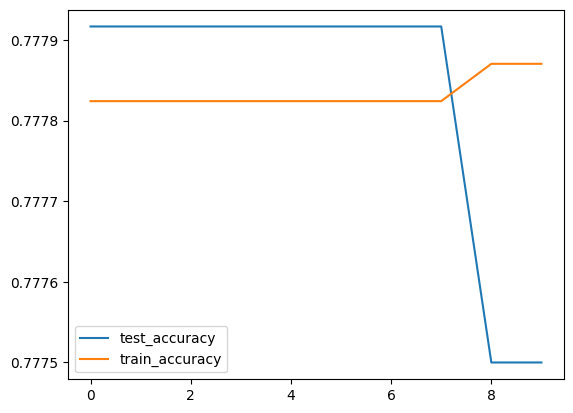

In [68]:
df_score[["test_accuracy", "train_accuracy"]].plot()

<br><br>

## Linear models <a name="7"></a>
<hr>

**tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [69]:
logistic_regression_pipe = make_pipeline(Transformer, LogisticRegression(max_iter=1000))
logistic_regression_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['ID', 'LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [70]:
param_grid = [{
    "logisticregression__C" : np.logspace(-7,7,10)
}]

In [71]:
gvc = GridSearchCV(logistic_regression_pipe, 
                   param_grid=param_grid,
                  cv=5,
                  return_train_score=True,
                  verbose=True)
gvc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\vasup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vasup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['ID',
                                                                          'LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'...
                                                                          'MARRIAGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=[{'logisticregression__C': array([1.00000000e-07, 3.59381366e-06, 1.29154967e-04, 4.64158883e-03,
       1.66810054e-01, 5.99484250e+00, 2.15443469e+02, 7.74263683e+03,
       2.78255940e+05, 1.00000000e+07])}],
             return_train_score=True, verbose=True)

In [72]:
cv_score = pd.DataFrame(gvc.cv_results_)
cv_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.165281,0.051062,0.016508,0.004402,0.0,{'logisticregression__C': 1e-07},0.777917,0.777917,0.777917,0.777708,...,0.777833,0.000102,8,0.777813,0.777813,0.777813,0.777865,0.777865,0.777833,0.000026
1,0.133552,0.011756,0.016473,0.002082,0.000004,{'logisticregression__C': 3.5938136638046257e-06},0.777917,0.777917,0.777917,0.777708,...,0.777833,0.000102,8,0.777813,0.777813,0.777813,0.777865,0.777865,0.777833,0.000026
2,0.142563,0.015728,0.021339,0.001749,0.000129,{'logisticregression__C': 0.0001291549665014884},0.777917,0.777917,0.777917,0.777708,...,0.777833,0.000102,8,0.777813,0.777813,0.777813,0.777865,0.777865,0.777833,0.000026
3,0.312871,0.024357,0.020013,0.005411,0.004642,{'logisticregression__C': 0.004641588833612782},0.808750,0.812708,0.808542,0.817500,...,0.811583,0.003314,7,0.812240,0.811302,0.812292,0.809740,0.810885,0.811292,0.000946
4,0.974393,0.109507,0.015179,0.000244,0.16681,{'logisticregression__C': 0.1668100537200059},0.816875,0.818750,0.814792,0.828125,...,0.819625,0.004559,1,0.822448,0.821562,0.822552,0.819115,0.820885,0.821313,0.001257
5,2.487577,0.104711,0.018946,0.005995,5.994843,{'logisticregression__C': 5.994842503189409},0.816250,0.817708,0.815000,0.829167,...,0.819500,0.005049,3,0.822552,0.821771,0.822865,0.820052,0.821719,0.821792,0.000976
6,4.823619,0.972296,0.017429,0.004042,215.443469,{'logisticregression__C': 215.44346900318865},0.816250,0.817708,0.814792,0.828958,...,0.819500,0.005010,3,0.822708,0.821719,0.822708,0.819948,0.821771,0.821771,0.001008
7,5.037599,0.872324,0.015923,0.003697,7742.636827,{'logisticregression__C': 7742.636826811277},0.816250,0.817708,0.814792,0.828958,...,0.819500,0.005010,3,0.822656,0.821771,0.822760,0.820000,0.821667,0.821771,0.000991
8,5.316954,0.176834,0.015047,0.004514,278255.940221,{'logisticregression__C': 278255.94022071257},0.816250,0.818125,0.814792,0.828958,...,0.819583,0.004983,2,0.822760,0.821823,0.822760,0.820052,0.821719,0.821823,0.000990
9,6.141988,1.181064,0.020963,0.005016,10000000.0,{'logisticregression__C': 10000000.0},0.816250,0.817708,0.814792,0.828958,...,0.819500,0.005010,3,0.822708,0.821719,0.822760,0.820260,0.821719,0.821833,0.000908


In [73]:
print("Best parameter : ", gvc.best_params_, "\nBest score : ", gvc.best_score_)

Best parameter :  {'logisticregression__C': 0.1668100537200059} 
Best score :  0.819625


<br><br>

## Different classifiers <a name="8"></a>
<hr>

**tasks:**
1. Trying at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize our results. Can you beat logistic regression? 

In [45]:
scoring = ["accuracy", 
           "precision", 
           "recall", 
           "f1"]

classifiers = {
    "Random_forest" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(),
    "SupportVector" : SVC(),
    "DecisionTree" : DecisionTreeClassifier()
}

results_dict = {
    "model_name":[],"fit_time":[],"score_time":[],"test_accuracy": [],"train_accuracy":[],"test_recall":[],
    "train_recall": [],"test_precision":[],"train_precision":[],"test_f1":[],"train_f1":[]
}

In [46]:
for i,model in classifiers.items():
    pipe_model = make_pipeline(Transformer, model)
    result = cross_validate(estimator=pipe_model,
                           X=X_train,
                           y=y_train,
                           cv=10,
                           scoring=scoring,
                           return_train_score=True,
                           verbose=True,
                            n_jobs=1
                           )
    results_dict["model_name"].append(model)
    # Print result
    
    for j in result.keys():
        results_dict[j].append(result[j].mean())


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   40.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.8s finished


In [47]:
pd.DataFrame(results_dict)

,model_name,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,RandomForestClassifier(),6.169535,0.109390,0.816333,0.999954,0.359902,0.999792,0.658916,1.000000,0.465285,0.999896
1,KNeighborsClassifier(),0.051366,0.498256,0.793917,0.841394,0.325017,0.437276,0.563324,0.743089,0.412008,0.550558
2,SVC(),77.154929,5.584506,0.818792,0.824032,0.326144,0.342565,0.696877,0.717948,0.444017,0.463786
3,DecisionTreeClassifier(),0.898084,0.015626,0.719625,1.000000,0.408478,1.000000,0.378630,1.000000,0.392934,1.000000


<br><br>

<br><br>

## Hyperparameter optimization <a name="10"></a>
<hr>

**tasks:**

Make some attempts to optimize hyperparameters for the models i've tried and summarize my results. I may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. I may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [51]:
# defining parameter range
param_grid = {
    "svc__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "svc__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

pipe_svm = make_pipeline(Transformer, SVC())
RandomSearch = RandomizedSearchCV(estimator=pipe_svm,
                                  param_distributions=param_grid,
                                  n_jobs=1,
                                  return_train_score=True,
                                  cv=5,
                                  verbose=3,
                                  n_iter=10,
                                  random_state=123)
# fitting the model for grid search
RandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END svc__C=0.01, svc__gamma=0.001;, score=(train=0.778, test=0.778) total time=  35.7s
[CV 2/5] END svc__C=0.01, svc__gamma=0.001;, score=(train=0.778, test=0.778) total time=  35.6s
[CV 3/5] END svc__C=0.01, svc__gamma=0.001;, score=(train=0.778, test=0.778) total time=  35.4s
[CV 4/5] END svc__C=0.01, svc__gamma=0.001;, score=(train=0.778, test=0.778) total time=  36.7s
[CV 5/5] END svc__C=0.01, svc__gamma=0.001;, score=(train=0.778, test=0.778) total time=  36.5s
[CV 1/5] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.781, test=0.782) total time=  44.4s
[CV 2/5] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.780, test=0.781) total time=  44.4s
[CV 3/5] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.780, test=0.780) total time=  45.5s
[CV 4/5] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.779, test=0.779) total time=  44.8s
[CV 5/5] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.780, test=0.779) total ti

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['ID',
                                                                                'LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['SEX',
                                                                                'EDUCATION',
                                                                                'MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('svc', SVC())]),
                   n_jobs=1,
                   param_distributions={'svc__C': [0.001, 0.01, 0.1, 1.0, 10,
                                                   100],
                                        'svc__gamma': [0.001, 0.01, 0.1, 1.0,
                                                       10, 100]},
                   random_state=123, return_train_score=True, verbose=3)

In [52]:
print("Best parameter : ", RandomSearch.best_params_, "\nBest score : ", RandomSearch.best_score_)

Best parameter :  {'svc__gamma': 0.01, 'svc__C': 100} 
Best score :  0.8184166666666666


In [54]:
pd.DataFrame(RandomSearch.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,26.670849,34.593981,31.431891,173.724729,62.157392,326.791576,264.756775,114.597729,31.677275,31.993176
std_fit_time,0.447075,0.664215,0.157445,65.481196,0.152538,27.314883,4.253463,2.039003,1.860617,0.907637
mean_score_time,9.404007,10.578916,9.435286,26.472658,16.791898,11.379434,26.482973,9.106976,9.848479,9.452702
std_score_time,0.117958,0.195377,0.158411,0.2375,0.320214,0.92875,0.224196,0.233131,0.259293,0.210397
param_svc__gamma,0.001,0.1,0.01,100,100,0.1,100,0.01,0.001,0.001
param_svc__C,0.01,0.01,0.1,0.01,0.001,100,1.0,100,0.1,1.0
params,"{'svc__gamma': 0.001, 'svc__C': 0.01}","{'svc__gamma': 0.1, 'svc__C': 0.01}","{'svc__gamma': 0.01, 'svc__C': 0.1}","{'svc__gamma': 100, 'svc__C': 0.01}","{'svc__gamma': 100, 'svc__C': 0.001}","{'svc__gamma': 0.1, 'svc__C': 100}","{'svc__gamma': 100, 'svc__C': 1.0}","{'svc__gamma': 0.01, 'svc__C': 100}","{'svc__gamma': 0.001, 'svc__C': 0.1}","{'svc__gamma': 0.001, 'svc__C': 1.0}"
split0_test_score,0.777917,0.781875,0.808542,0.777917,0.777917,0.76625,0.777708,0.811458,0.777917,0.811458
split1_test_score,0.777917,0.780625,0.818125,0.777917,0.777917,0.765,0.778125,0.816667,0.777917,0.81875
split2_test_score,0.777917,0.779792,0.811042,0.777917,0.777917,0.761875,0.777917,0.816458,0.777917,0.810625


<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>

**tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [ ]:
RandomSearch.best_estimator_.score(X_test, y_test)

In [57]:
print(classification_report(y_test, RandomSearch.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.65      0.37      0.47      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



<br><br>

<br><br>

## Summary of results <a name="13"></a>
<hr>

**tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

**(1)**
final_test_score = 0.8184166666666666

**(2)**
Thus, SVC() takes plenty of time to train as well as on tuning hyperparameter. Meanwhile, SVC() is performing very optimum among the other classifiers and also shows better precision, recall and f1 score which is very benificial of us to get precise (ŷ).

**(3)**
I have also compare SVC() with RandomForestClassifier because in the mid way of projet i thought that RandomForestClassifier
will act mature and show good result. however, turned out performing overfitting [Different classifiers](#8)

In addition, during [Hyperparameter optimization](#10) i haved used [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) because we had you a large parameter space
One advantage of randomized search is that it can be more efficient. Since, it does not train a separate model for every combination of hyperparameter values. Instead, it trains a specified number of models using random samples from the hyperparameter distributions.
